In [349]:
using Plots; pyplot()
using StatsBase

In [350]:
points = Any[
    "Philipp Holl" 67.5 true NaN
    "Korbinian Urban" 57.5 true NaN
     "Thomas Baldauf" 62.0 true NaN
     "Patrick Krause" 61.5 false NaN
     "Oskar Moras" 55.0 false NaN
     "Irina Ilicheva" 55.0 false NaN
     "Josef Keilhofer" 59.0 true NaN
     "Radu Bors" 54.5 false NaN
     "Johannes Summer" 55.0 true NaN
     "Magnus Lindström" 65.0 false NaN
     "Jingzhun Liu" 38.5 false NaN
     "Chen Yang	" 57.0 false NaN
     "Abdoulaye Sall" 24.5 false NaN 
];
points = sortrows(points, by=x->(x[2]), rev=true)
max_points = 68.0
grading_scale = [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.3, 4.7, 5.0];

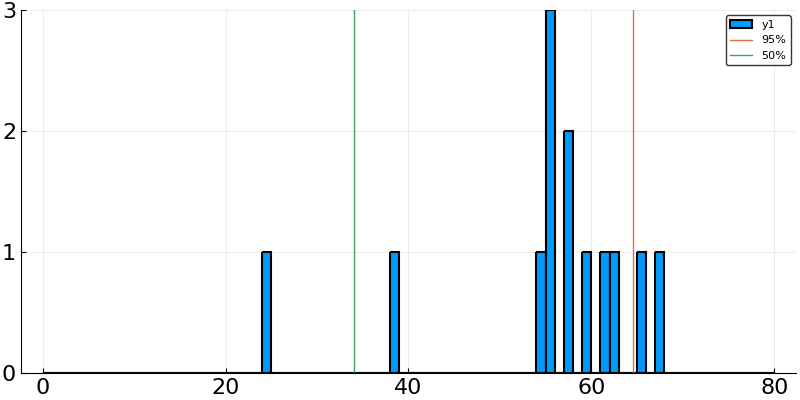

In [351]:
h = Histogram(0:1:80, :left)
append!(h, points[:,2])
plot(h, lw=1.5, size=(800,400), axis=font(16))
vline!([68*0.95], label="95%")
vline!([68*0.50], label="50%")

In [360]:
function grade(step::Float64, offset::Float64)
    n = zeros(Int, length(grades));
    pointminimum = offset - step * (length(grades)-1)
    for idx in eachindex(points_arr)
        percentage = points[:,2][idx] / max_points
        # bonus? 
        if points[:,3][idx] == true percentage += step end
        graded = false
        for (j,interval) in enumerate(offset:-step:pointminimum)
            if idx == 1 println("$(round(interval, 2))\t<=>\t$(grading_scale[j])") end
            if (percentage >= interval) && !graded
                points[idx, 4] = grading_scale[j]
                n[j] += 1
                graded = true
            end
        end
        if !graded
            n[end] += 1
        end
    end
    average = mean( n .* grading_scale )
    println("average: $(round(average, 3))")
    return n
end

grade (generic function with 2 methods)

In [361]:
g = grade(0.05, 0.95);

0.95	<=>	1.0
0.9	<=>	1.3
0.85	<=>	1.7
0.8	<=>	2.0
0.75	<=>	2.3
0.7	<=>	2.7
0.65	<=>	3.0
0.6	<=>	3.3
0.55	<=>	3.7
0.5	<=>	4.0
0.45	<=>	4.3
0.4	<=>	4.7
0.35	<=>	5.0
average: 1.977


13×4 Array{Any,2}:
 "Philipp Holl"      67.5   true  1.0
 "Magnus Lindström"  65.0  false  1.0
 "Thomas Baldauf"    62.0   true  1.0
 "Patrick Krause"    61.5  false  1.3
 "Josef Keilhofer"   59.0   true  1.3
 "Korbinian Urban"   57.5   true  1.7
 "Chen Yang\t"       57.0  false  2.0
 "Oskar Moras"       55.0  false  2.0
 "Irina Ilicheva"    55.0  false  2.0
 "Johannes Summer"   55.0   true  1.7
 "Radu Bors"         54.5  false  2.0
 "Jingzhun Liu"      38.5  false  3.7
 "Abdoulaye Sall"    24.5  false  5.0

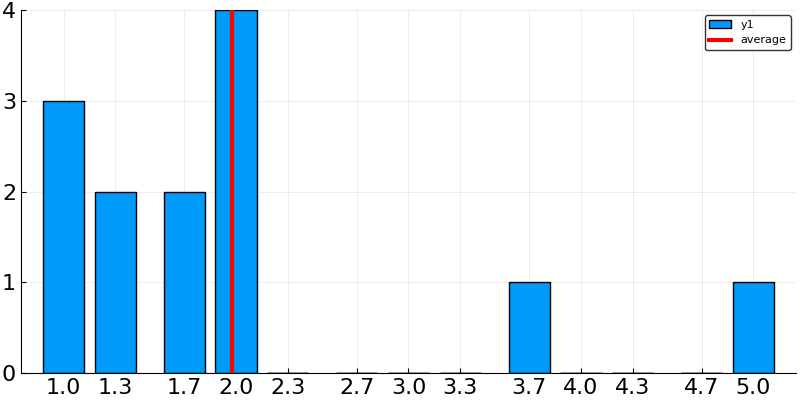

In [362]:
display(points)
plot(grades, g, st=:bar, size=(800,400), axis=font(16), xticks=grades)
average = mean( g .* grading_scale )
vline!([average], label="average", lw=3., color="red")

In [356]:
sortrows(points, by=x->(x[4]))

13×4 Array{Any,2}:
 "Philipp Holl"      67.5   true  1.0
 "Magnus Lindström"  65.0  false  1.0
 "Thomas Baldauf"    62.0   true  1.0
 "Patrick Krause"    61.5  false  1.3
 "Josef Keilhofer"   59.0   true  1.3
 "Korbinian Urban"   57.5   true  1.7
 "Johannes Summer"   55.0   true  1.7
 "Chen Yang\t"       57.0  false  2.0
 "Oskar Moras"       55.0  false  2.0
 "Irina Ilicheva"    55.0  false  2.0
 "Radu Bors"         54.5  false  2.0
 "Jingzhun Liu"      38.5  false  3.7
 "Abdoulaye Sall"    24.5  false  5.0